In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Symptome disease file

## 1 clean data

### 1.0  Load and check data

In [2]:
##Google collab import
#from google.colab import drive
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/Notebooks/MedAI/raw_data/Final_Augmented_dataset_Diseases_and_Symptoms.csv')
#df_symp=df

In [2]:
df_symp = pd.read_csv('../raw_data/Final_Augmented_dataset_Diseases_and_Symptoms.csv')

In [4]:
df_symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [9]:
df_diseases=df_symp['diseases'].value_counts()
pd.DataFrame(df_diseases)

,count
diseases,
cystitis,1219
vulvodynia,1218
nose disorder,1218
complex regional pain syndrome,1217
spondylosis,1216
...,...
thalassemia,1
huntington disease,1
typhoid fever,1


In [5]:
df_symp.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#some symtomes have only 1 value, which makes no sense if teh value is 0, so we will drop them
#select columns with only 1 unique value

df_symp.nunique()

diseases                            773
anxiety and nervousness               2
depression                            2
shortness of breath                   2
depressive or psychotic symptoms      2
                                   ... 
hip weakness                          1
back swelling                         1
ankle stiffness or tightness          1
ankle weakness                        2
neck weakness                         1
Length: 378, dtype: int64

In [7]:
# Check the shape
print(df_symp.shape)


(246945, 378)


In [8]:
#Number of disease occurences
df_symp['diseases'].value_counts()

diseases
cystitis                          1219
vulvodynia                        1218
nose disorder                     1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
typhoid fever                        1
rocky mountain spotted fever         1
open wound of the knee               1
hypergammaglobulinemia               1
open wound due to trauma             1
Name: count, Length: 773, dtype: int64

In [9]:
#Distrubution of number of symptoms per observations
df_symp.iloc[:,1:].sum(axis=1).value_counts()

5     57989
6     51116
4     47283
7     34037
3     25451
8     16425
2      6448
9      5980
10     1534
1       443
11      231
12        8
Name: count, dtype: int64

In [10]:
#distribution of average number of symptoms per unique disease
df_symp.iloc[:,1:].sum(axis=1).value_counts()/len(df_symp)

5     0.234826
6     0.206993
4     0.191472
7     0.137832
3     0.103063
8     0.066513
2     0.026111
9     0.024216
10    0.006212
1     0.001794
11    0.000935
12    0.000032
Name: count, dtype: float64


### 1.1 Clean symptoms and disease

In [11]:
# Remove classes with only 1 observation
#Count observations per disease
class_counts = df_symp['diseases'].value_counts()
#filter
filtered_classes = class_counts[class_counts > 1].index
#apply filter on df
df_symp_disease_filtered = df_symp[df_symp['diseases'].isin(filtered_classes)]
df_symp_disease_filtered.shape

(246926, 378)

In [12]:
#Identify columns with only one unique value
columns_single_value = [col for col in df_symp_disease_filtered.columns if df_symp_disease_filtered[col].nunique() == 1]
df_symp_single_value = df_symp_disease_filtered[columns_single_value]
#remove them from df
df_symp_filtered= df_symp_disease_filtered.drop(columns = columns_single_value)

In [13]:
df_symp_filtered.shape

(246926, 326)

In [14]:
#check if there are duplicates
df_symp_filtered.duplicated().sum()

57298

In [56]:
# Initialize dictionary
disease_symptom_dict = {}

# Iterate through each disease
for disease in df_symp["diseases"].unique():
    #Select all rows related to this disease
    disease_rows = df_symp[df_symp["diseases"] == disease].drop(columns=["diseases"])

    # Count occurrences of each symptom
    symptom_counts = disease_rows.sum()

    # Total number of observations for this disease
    total_cases = len(disease_rows)

    # Compute weight = (occurrences / total cases)
    symptom_weights = (symptom_counts / total_cases)

    # Remove symptoms with 0 occurrences
    symptom_weights = symptom_weights[symptom_weights > 0].to_dict()

    # Store in dictionary
    disease_symptom_dict[disease] = symptom_weights

print(f"✅ Computed weights for {len(disease_symptom_dict)} diseases")


✅ Computed weights for 773 diseases


In [59]:
disease_symptom_dict

{'panic disorder': {'anxiety and nervousness': 0.4961496149614962,
  'depression': 0.4961496149614962,
  'shortness of breath': 0.48954895489548955,
  'depressive or psychotic symptoms': 0.682068206820682,
  'dizziness': 0.5258525852585259,
  'insomnia': 0.517051705170517,
  'abnormal involuntary movements': 0.5159515951595159,
  'chest tightness': 0.5082508250825083,
  'palpitations': 0.4961496149614962,
  'irregular heartbeat': 0.5005500550055005,
  'breathing fast': 0.5148514851485149},
 'vocal cord polyp': {'hoarse voice': 0.5,
  'sore throat': 0.4888888888888889,
  'difficulty speaking': 0.7666666666666667,
  'throat swelling': 0.8111111111111111,
  'throat feels tight': 0.7888888888888889},
 'turner syndrome': {'depression': 1.0, 'emotional symptoms': 1.0},
 'cryptorchidism': {'lack of growth': 1.0,
  'symptoms of the scrotum and testes': 0.8,
  'swelling of scrotum': 0.8},
 'poisoning due to ethylene glycol': {'depression': 1.0,
  'depressive or psychotic symptoms': 0.875,
  'ab

In [69]:
list(disease_symptom_dict.keys())[0]

'panic disorder'

In [58]:
df_symp.value_counts()

diseases                             anxiety and nervousness  depression  shortness of breath  depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  abnormal involuntary movements  chest tightness  palpitations  irregular heartbeat  breathing fast  hoarse voice  sore throat  difficulty speaking  cough  nasal congestion  throat swelling  diminished hearing  lump in throat  throat feels tight  difficulty in swallowing  skin swelling  retention of urine  groin mass  leg pain  hip pain  suprapubic pain  blood in stool  lack of growth  emotional symptoms  elbow weakness  back weakness  pus in sputum  symptoms of the scrotum and testes  swelling of scrotum  pain in testicles  flatulence  pus draining from ear  jaundice  mass in scrotum  white discharge from eye  irritable infant  abusing alcohol  fainting  hostile behavior  drug abuse  sharp abdominal pain  feeling ill  vomiting  headache  nausea  diarrhea  vaginal itching  vaginal dryness  painful urination  involuntary u

In [ ]:

    # Save to PKL file
    with open(save_path, "wb") as f:
        pickle.dump(disease_symptom_dict, f)

    print(f"💾 Saved dictionary to {save_path}")

    return disease_symptom_dict

# Example Usage
disease_dict = create_disease_symptom_dict(df_symptoms)

### 1.2 Generating Feature / target datasets

In [15]:
X=df_symp_filtered.drop(['diseases'], axis=1)
X.shape

(246926, 325)

In [16]:
y=df_symp_filtered['diseases']
y.shape

(246926,)

## 2 Classification model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [18]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([516, 516, 516, ..., 491, 491, 491])

In [19]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)  # Save trained encoder

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.35,     # 35% test split
    random_state=42,   # for reproducibility
    stratify=y_encoded # ensures balanced distribution of diseases in train/test
)

### 2.1 Random forest

#### 2.1.1 Training for evaluation of model (Spliting)

In [38]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,    # number of trees
    max_depth=30,
    min_samples_split=5, # Prevents trees from growing too deep
    min_samples_leaf=2,  # Forces leaves to have at least 2 samples
    max_features="sqrt",
    n_jobs=-1            # use all available CPU cores
)


In [39]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_jobs=-1)

In [40]:
y_pred = rf_classifier.predict(X_test)

y_pred

array([659, 277, 172, ..., 393, 329, 354])

In [41]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7388487127567255

In [28]:
from sklearn.metrics import recall_score

# Macro-averaged recall
macro_recall = recall_score(y_test, y_pred, average='macro')

# Weighted-averaged recall
weighted_recall = recall_score(y_test, y_pred, average='weighted')

print(f"Macro-Averaged Recall: {macro_recall:.4f}")
print(f"Weighted-Averaged Recall: {weighted_recall:.4f}")

Macro-Averaged Recall: 0.7321
Weighted-Averaged Recall: 0.6148


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=_names=label_encoder.classes_))


#### 2.1.2 Training for app (full dataset)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [3]:
#Label_Encoding the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

NameError: name 'LabelEncoder' is not defined

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=50,    # number of trees
    max_depth=30,       # grow to 30
    n_jobs=-1           # use all available CPU cores
)

In [ ]:
rf_classifier.fit(X, y_encoded)

RandomForestClassifier(max_depth=30, n_estimators=50, n_jobs=-1)

In [ ]:
df_symp_filtered[0:10]

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,joint swelling,redness in or around nose,wrinkles on skin,foot or toe weakness,hand or finger cramps or spasms,back stiffness or tightness,wrist lump or mass,low urine output,sore in nose,ankle weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,panic disorder,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,panic disorder,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,panic disorder,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,panic disorder,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,panic disorder,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y[0]

'panic disorder'

In [ ]:
test=label_encoder.classes_[rf_classifier.predict(X[0:1])][0]
print(test)

panic disorder


In [ ]:
rf_classifier.predict(X[0:1])[0]


516

In [ ]:
#import pickle

# save
#with open('model_rf.pkl','wb') as f:
#    pickle.dump(rf_classifier,f)


In [ ]:
probs=rf_classifier.predict_proba(X[0:1])

In [ ]:
probs_flat=probs[0]

In [ ]:
df_probs = pd.DataFrame({
    "Disease": label_encoder.classes_,  # List of disease names
    "Probability": probs_flat   # Corresponding probabilities
})

In [ ]:
df_probs_sorted = df_probs.sort_values(by="Probability", ascending=False).reset_index(drop=True)

In [ ]:
df_probs_sorted[0:10]

,Disease,Probability
0,panic disorder,0.641914
1,esophagitis,0.003553
2,ischemic heart disease,0.003198
3,pulmonary embolism,0.002631
4,heart block,0.002212
5,acute bronchospasm,0.002040
6,heart failure,0.001968
7,pulmonary congestion,0.001933
8,sinus bradycardia,0.001821
9,hypertensive heart disease,0.001818


In [ ]:
print(X[0:1])

   anxiety and nervousness  depression  shortness of breath  \
0                        1           0                    1   

   depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  \
0                                 1                 0          0         0   

   abnormal involuntary movements  chest tightness  palpitations  ...  \
0                               0                1             1  ...   

   joint swelling  redness in or around nose  wrinkles on skin  \
0               0                          0                 0   

   foot or toe weakness  hand or finger cramps or spasms  \
0                     0                                0   

   back stiffness or tightness  wrist lump or mass  low urine output  \
0                            0                   0                 0   

   sore in nose  ankle weakness  
0             0               0  

[1 rows x 325 columns]


: 

#### 2.1.3 testing predict

In [ ]:
from medai.main import pred  # Import a specific function
pred(X[0:1])

ModuleNotFoundError: No module named 'medai'

: 

### 2.2 XGBOOST

In [23]:
#!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 125.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 97.7 MB/s eta 0:00:0000:0100:01


In [44]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle


In [35]:
#!pip install scikit-learn==1.3.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


#### 2.2.1 Training model 1

In [25]:
model = xgb.XGBClassifier(
    n_estimators=50,    # Number of trees
    learning_rate=0.1,   # Step size shrinkage
    max_depth=30,         # Maximum tree depth
    objective="multi:softprob", # For multi-class classification
    eval_metric="mlogloss"
)

In [26]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8347


In [32]:
from sklearn.metrics import recall_score

# Macro-averaged recall
macro_recall = recall_score(y_test, y_pred, average='macro')

# Weighted-averaged recall
weighted_recall = recall_score(y_test, y_pred, average='weighted')

print(f"Macro-Averaged Recall: {macro_recall:.4f}")
print(f"Weighted-Averaged Recall: {weighted_recall:.4f}")

Macro-Averaged Recall: 0.7441
Weighted-Averaged Recall: 0.8347


In [29]:
#import pickle

# save
with open('XGB_model.pkl','wb') as f:
    pickle.dump(model,f)

In [36]:
model.predict(X[0:1])[0]

In [37]:
probs=model.predict_proba(X[0:1])[0]

In [39]:
df_probs = pd.DataFrame({
    "Disease": label_encoder.classes_,  # List of disease names
    "Probability": probs   # Corresponding probabilities
})

In [42]:
df_probs.sort_values(by="Probability", ascending=False).reset_index(drop=True)[0:10]

,Disease,Probability
0,panic disorder,0.997007
1,anxiety,0.001486
2,panic attack,0.000195
3,sinus bradycardia,0.000101
4,acute respiratory distress syndrome (ards),0.000079
5,angina,0.000072
6,abscess of the lung,0.000064
7,premature ventricular contractions (pvcs),0.000059
8,heart block,0.000058
9,drug abuse (methamphetamine),0.000055


#### 2.2.2 XGB model 2

In [ ]:
✅ Lower max_depth to 8-15 to prevent overfitting.
✅ Increase min_child_weight (e.g., 5-10) to reduce bias towards frequent diseases.
✅ Use regularization (gamma=1-5, reg_alpha=0.1-1, reg_lambda=1-10) to prune unnecessary splits.
✅ Increase n_estimators (200-500) while reducing learning_rate (0.05-0.01) for stability.
✅ Use scale_pos_weight for rare diseases OR try SMOTE for synthetic balancing.
✅ Feature selection: Drop unimportant symptoms based on feature_importances_.
✅ Hyperparameter tuning: Use Bayesian Optimization or GridSearchCV to automate tuning.

In [45]:
model_2 = xgb.XGBClassifier(
    n_estimators=100,    # Number of trees
    learning_rate=0.05,   # Step size shrinkage
    max_depth=30,        # Maximum tree depth
    objective="multi:softprob", # For multi-class classification
    eval_metric="mlogloss",
    reg_alpha=1.0,       # L1 regularization (Lasso) - Helps remove less important features
    reg_lambda=1.0,      # L2 regularization (Ridge) - Helps reduce model complexity
    subsample=0.8,       # Use 80% of data per boosting round (helps generalization)
    colsample_bytree=0.8 # Use 80% of features per tree (reduces correlation between trees)
)

In [23]:
model_2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
# Evaluate Model
y_pred = model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8498


In [25]:
from sklearn.metrics import recall_score

# Macro-averaged recall
macro_recall = recall_score(y_test, y_pred, average='macro')

# Weighted-averaged recall
weighted_recall = recall_score(y_test, y_pred, average='weighted')

print(f"Macro-Averaged Recall: {macro_recall:.4f}")
print(f"Weighted-Averaged Recall: {weighted_recall:.4f}")

Macro-Averaged Recall: 0.7107
Weighted-Averaged Recall: 0.8498


In [46]:
model_2.fit(X, y_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
import pickle

#save
with open('xgb_model_full.pkl','wb') as f:
    pickle.dump(model_2,f)

In [47]:
from sklearn.model_selection import GridSearchCV

In [49]:
from xgboost import XGBClassifier


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [6, 12, 20],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 300, 500],
    "min_child_weight": [1, 5, 10],
    "gamma": [0, 1, 5]
}


In [50]:
grid_search = GridSearchCV(XGBClassifier(objective="multi:softprob", eval_metric="mlogloss"),
                           param_grid, scoring="recall_macro", cv=3, verbose=1)


In [61]:
pd.DataFrame(y_train).value_counts()

0  
164    792
471    792
747    792
137    791
233    790
      ... 
325      1
96       1
179      1
297      1
487      1
Name: count, Length: 754, dtype: int64

In [ ]:
print(grid_search.best_params_)

# Global health file

In [ ]:
df_glob= pd.read_csv('/home/greg_ytch/code/Gregytch/MedAI/raw_data/Global Health Statistics.csv')

In [ ]:
df_glob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

### 1.3 Trying to detect disease duplicates :)

#### 1.3.1 Using BERT transformer (Disease name similarities)[texte du lien](https://)

In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


/home/greg_ytch/.pyenv/versions/MedAI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')


In [12]:
# Compute embeddings for disease names
disease_names = df_symp['diseases'].unique()  # Ensure this is your disease column
embeddings = model.encode(disease_names)


In [13]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(embeddings)

In [14]:
# Create a DataFrame for easier analysis
similarity_df = pd.DataFrame(similarity_matrix, index=disease_names, columns=disease_names)

In [15]:
similarity_df

,panic disorder,vocal cord polyp,turner syndrome,cryptorchidism,poisoning due to ethylene glycol,atrophic vaginitis,fracture of the hand,cellulitis or abscess of mouth,eye alignment disorder,headache after lumbar puncture,...,asperger syndrome,mucositis,paronychia,open wound of the jaw,white blood cell disease,kaposi sarcoma,spondylolisthesis,pseudotumor cerebri,conjunctivitis due to virus,open wound of the nose
panic disorder,1.000000,0.155756,0.295813,0.169176,0.119427,0.121752,0.184884,0.144502,0.298896,0.062025,...,0.424484,0.274366,0.359078,0.094402,0.205889,0.081042,0.024803,0.131095,0.008914,0.096348
vocal cord polyp,0.155756,1.000000,0.084634,0.127149,-0.046187,0.140738,-0.003090,0.114625,0.138783,0.112479,...,0.101505,0.117955,0.162369,0.121994,-0.055274,0.087300,0.128312,0.197879,0.067599,0.108351
turner syndrome,0.295813,0.084634,1.000000,0.041826,0.063627,0.233882,0.197095,0.147151,0.284176,0.038033,...,0.311000,0.189882,0.276271,0.043165,0.332705,0.117714,0.159715,0.185973,0.158220,0.059740
cryptorchidism,0.169176,0.127149,0.041826,1.000000,-0.059241,0.009747,0.045250,0.013862,0.023424,-0.025014,...,0.155001,0.047768,0.223117,0.067575,0.043957,0.053796,0.040319,0.229106,0.000858,0.106139
poisoning due to ethylene glycol,0.119427,-0.046187,0.063627,-0.059241,1.000000,0.122066,0.114489,0.224442,0.073056,0.126277,...,0.055959,0.176082,0.146068,0.069439,0.135567,0.127535,0.069309,0.140973,0.214252,0.123702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kaposi sarcoma,0.081042,0.087300,0.117714,0.053796,0.127535,0.111094,0.207616,0.193021,0.175148,0.081228,...,0.163214,0.217736,0.187912,0.207875,0.148733,1.000000,0.147806,0.284191,0.216428,0.158900
spondylolisthesis,0.024803,0.128312,0.159715,0.040319,0.069309,0.183328,0.252572,0.063998,0.106696,0.116700,...,0.056203,0.166628,0.224765,0.162850,0.079758,0.147806,1.000000,0.189384,0.046528,0.137633
pseudotumor cerebri,0.131095,0.197879,0.185973,0.229106,0.140973,0.214001,0.092056,0.374639,0.186466,0.207602,...,0.252453,0.282939,0.186451,0.281989,0.183693,0.284191,0.189384,1.000000,0.179778,0.145990
conjunctivitis due to virus,0.008914,0.067599,0.158220,0.000858,0.214252,0.423167,0.091569,0.319037,0.382055,0.171423,...,0.197036,0.453843,0.097629,0.226780,0.216553,0.216428,0.046528,0.179778,1.000000,0.266818


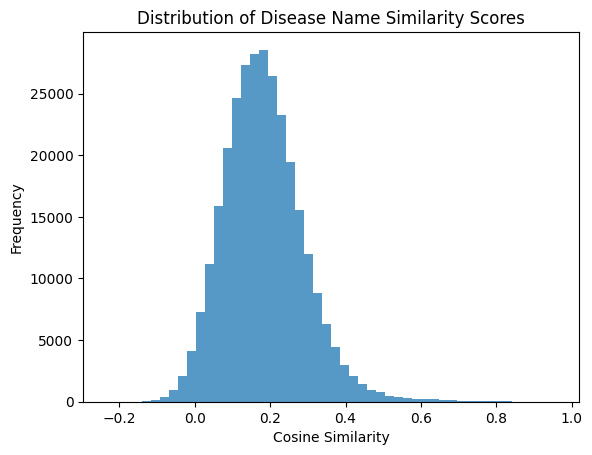

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the matrix to get all pairwise similarity scores
similarity_scores = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]

# Plot the histogram
plt.hist(similarity_scores, bins=50, alpha=0.75)
plt.title("Distribution of Disease Name Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Extract top pairs with similarity > 0.8
threshold = 0.8
similar_pairs = []

for i in range(len(disease_names)):
    for j in range(i + 1, len(disease_names)):  # Only look at upper triangle
        if similarity_matrix[i, j] > threshold:
            similar_pairs.append((disease_names[i], disease_names[j], similarity_matrix[i, j]))

# Sort pairs by similarity
similar_pairs = sorted(similar_pairs, key=lambda x: x[2], reverse=True)

# Display top pairs
for pair in similar_pairs:  # Inspect top 10 pairs
    print(pair)

('chronic rheumatic fever', 'rheumatic fever', np.float32(0.95978165))
('lymphangitis', 'lymphadenitis', np.float32(0.9548303))
('acute bronchiolitis', 'acute bronchitis', np.float32(0.9410487))
('chronic otitis media', 'otitis media', np.float32(0.9165085))
('vaginal yeast infection', 'yeast infection', np.float32(0.90641254))
('paroxysmal ventricular tachycardia', 'paroxysmal supraventricular tachycardia', np.float32(0.90620726))
('acute otitis media', 'otitis media', np.float32(0.9036576))
('conjunctivitis due to bacteria', 'conjunctivitis', np.float32(0.9023233))
('idiopathic excessive menstruation', 'idiopathic infrequent menstruation', np.float32(0.89926434))
('conjunctivitis due to allergy', 'conjunctivitis', np.float32(0.8971058))
('acute otitis media', 'chronic otitis media', np.float32(0.89631045))
('diverticulosis', 'diverticulitis', np.float32(0.8922903))
('injury of the ankle', 'fracture of the ankle', np.float32(0.889172))
('open wound of the cheek', 'open wound of the fa

In [ ]:
''' Diseases seem super close sometimes, mostly beause they are super specific not sure if it makes sense to cluster them with this methods since it will impact our recall / accuracy based on NLP methods'''
''' Maybe cluster thanks to symptoms is more consistent, since it should ave a direct impact on the KPI's, also make sense to group disease by symptoms for the users'''

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def find_similar_names_in_batches(text_list, batch_size=100, threshold=0.85):
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform(text_list)

    duplicates = []

    for i in range(0, len(text_list), batch_size):
        batch_matrix = matrix[i:i+batch_size]
        similarity = cosine_similarity(batch_matrix, matrix)

        for row_idx, row in enumerate(similarity):
            for col_idx, score in enumerate(row):
                if score > threshold and row_idx != col_idx:
                    duplicates.append((text_list[i + row_idx], text_list[col_idx], score))

    return duplicates


In [40]:
# Apply to disease names
disease_list = df_symp["diseases"].unique()
len(disease_list)


773

In [44]:
duplicates = find_similar_names_in_batches(disease_list, batch_size=100, threshold=0.85)
duplicates

[('abdominal hernia', 'abdominal hernia', np.float64(1.0000000000000002)),
 ('cerebral palsy', 'cerebral palsy', np.float64(1.0000000000000002)),
 ('marijuana abuse', 'marijuana abuse', np.float64(1.0000000000000002)),
 ('cryptococcosis', 'cryptococcosis', np.float64(1.0)),
 ('obesity', 'obesity', np.float64(1.0)),
 ('indigestion', 'indigestion', np.float64(1.0)),
 ('bursitis', 'bursitis', np.float64(1.0)),
 ('esophageal cancer', 'esophageal cancer', np.float64(1.0)),
 ('pulmonary congestion',
  'pulmonary congestion',
  np.float64(1.0000000000000002)),
 ('juvenile rheumatoid arthritis',
  'juvenile rheumatoid arthritis',
  np.float64(1.0)),
 ('actinic keratosis', 'actinic keratosis', np.float64(1.0000000000000002)),
 ('acute otitis media', 'acute otitis media', np.float64(1.0)),
 ('acute otitis media', 'otitis media', np.float64(0.8599147998672941)),
 ('astigmatism', 'astigmatism', np.float64(1.0)),
 ('tuberous sclerosis', 'tuberous sclerosis', np.float64(1.0000000000000002)),
 ('empy

In [ ]:

# View duplicate disease names
pd.DataFrame(duplicates, columns=["Disease 1", "Disease 2", "Similarity Score"])

In [45]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def batch_compute_similarity(text_list, batch_size=50, threshold=0.85):
    model = SentenceTransformer("all-MiniLM-L6-v2")  # Lightweight transformer
    embeddings = model.encode(text_list, convert_to_tensor=True)

    duplicates = []

    for i in range(0, len(text_list), batch_size):
        batch_embeddings = embeddings[i:i+batch_size]
        similarity = cosine_similarity(batch_embeddings.cpu().numpy(), embeddings.cpu().numpy())

        for row_idx, row in enumerate(similarity):
            for col_idx, score in enumerate(row):
                if score > threshold and row_idx != col_idx:
                    duplicates.append((text_list[i + row_idx], text_list[col_idx], score))

    return duplicates

# Apply to disease names
duplicates = batch_compute_similarity(disease_list, batch_size=50, threshold=0.85)

# View duplicate disease names
pd.DataFrame(duplicates, columns=["Disease 1", "Disease 2", "Similarity Score"])

,Disease 1,Disease 2,Similarity Score
0,panic disorder,panic attack,0.871652
1,fracture of the hand,fracture of the finger,0.857813
2,glaucoma,chronic glaucoma,0.869000
3,acute pancreatitis,chronic pancreatitis,0.868161
4,infectious gastroenteritis,noninfectious gastroenteritis,0.854637
...,...,...,...
780,spondylolisthesis,spondylolisthesis,1.000000
781,pseudotumor cerebri,pseudotumor cerebri,1.000000
782,conjunctivitis due to virus,conjunctivitis,0.876785
783,conjunctivitis due to virus,conjunctivitis due to virus,1.000000


#### Trying to get similar diseases based on symptoms

In [4]:
import requests
symptoms = "fever, headache, sore throat, sore muscles, tirehd, bla bli blu"
url = 'http://127.0.0.1:8000/diagnosis'
params = {'inputs': symptoms}
res = requests.get(url, params = params)
res.json()

{'Predictions': [{'Disease': 'interstitial lung disease',
   'Probability': 0.8500673174858093,
   'Symptoms': {'sore throat': 0.6614173228346457,
    'shortness of breath': 0.6456692913385826,
    'wheezing': 0.6437007874015748,
    'cough': 0.5354330708661418,
    'nasal congestion': 0.5196850393700787,
    'fever': 0.5196850393700787,
    'headache': 0.5098425196850394,
    'sleepiness': 0.49803149606299213,
    'abnormal breathing sounds': 0.48031496062992124}},
  {'Disease': 'muscle spasm',
   'Probability': 0.05243464559316635,
   'Symptoms': {'low back pain': 0.6843657817109144,
    'leg pain': 0.6696165191740413,
    'headache': 0.5294985250737463,
    'loss of sensation': 0.523598820058997,
    'neck pain': 0.5206489675516224,
    'arm pain': 0.5176991150442478,
    'back pain': 0.504424778761062,
    'muscle cramps, contractures, or spasms': 0.5,
    'abnormal involuntary movements': 0.49262536873156343,
    'sharp chest pain': 0.4778761061946903}},
  {'Disease': 'flu',
   'P

In [4]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import openai
# Set your OpenAI API key
openai_api_key = ''
# Initialize the OpenAI API client
openai.api_key = openai_api_key
client = openai.OpenAI(api_key=openai_api_key)
models = client.models.list()
print([model.id for model in models.data])

['dall-e-2', 'o1-mini-2024-09-12', 'o1-preview-2024-09-12', 'o1-mini', 'o1-preview', 'whisper-1', 'dall-e-3', 'babbage-002', 'omni-moderation-latest', 'omni-moderation-2024-09-26', 'tts-1-hd-1106', 'tts-1-hd', 'gpt-4o-mini-2024-07-18', 'gpt-4o-mini', 'tts-1', 'gpt-3.5-turbo-16k', 'tts-1-1106', 'davinci-002', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-instruct', 'gpt-3.5-turbo-instruct-0914', 'gpt-3.5-turbo-0125', 'gpt-3.5-turbo', 'text-embedding-3-large', 'text-embedding-3-small', 'text-embedding-ada-002']


In [28]:
def get_symptoms(free_text):
    client = openai.OpenAI(api_key=openai_api_key)

    completion = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": free_text}],
        functions=[
        {
            "name": "get_symptoms",
            "description": "Extract symptoms from a patient's free text input and return them as a list.",
            "parameters": {
                "type": "object",
                "properties": {
                    "symptoms": {
                        "type": "aray",
                        "items": {"type": "string"},
                        "description": "List of symptoms mentioned by the patient.",
                    },
                },
                "required": ["symptoms"],
            },
        }
    ],
    function_call="auto",
    )
    response = completion.choices[0].message.function_call
    if response and response.name == "get_symptoms":
        symptoms = response.arguments.get("symptoms", [])
        return symptoms
    return []

In [ ]:
symptoms = get_symptoms("I feel warm, maybe have fever, my head hurts, and I feel tired")
print(symptoms)

In [31]:
!pip install google-generativeai

In [9]:
import google.generativeai as genai
genai.configure(api_key= "")
API_KEY = ""

In [71]:
def extract_symptoms_gemini(symptom_description):
    """
    Extracts a list of symptoms from free-text description using the Gemini API.

    Args:
        symptom_description: The user's free-text description of symptoms.

    Returns:
        A list of extracted symptoms (strings), or None if there's an error.
        Returns an empty list if no symptoms are found.
    """
    try:
      genai.configure(api_key=API_KEY) # configure API key
      prompt = f"""
      Extract a list of individual symptoms from the following text.
      Return the symptoms as a comma-separated list, without new line at the end of the string. If no symptoms are found, return None.

      Text:
      {symptom_description}
      """
      model = genai.GenerativeModel("gemini-1.5-flash")# Or another suitable Gemini model
      response = model.generate_content(prompt)

      return response

    except Exception as e:
        print(f"Error calling Gemini API: {e}")
        return None


In [69]:
# Example usage:
symptom_description = "I had a great day today"
extracted_symptoms = extract_symptoms_gemini(symptom_description)


In [70]:
extracted_symptoms.text.strip()

'None'

In [ ]:

if extracted_symptoms is not None:
    if extracted_symptoms:
        print("Extracted Symptoms:", extracted_symptoms)
    else:
        print("No symptoms found.")

elif extracted_symptoms is None:
    print("An error occurred during symptom extraction.")


symptom_description = "I feel fine"
extracted_symptoms = extract_symptoms_gemini(symptom_description)

if extracted_symptoms is not None:
    if extracted_symptoms:
        print("Extracted Symptoms:", extracted_symptoms)
    else:
        print("No symptoms found.")

elif extracted_symptoms is None:
    print("An error occurred during symptom extraction.")

symptom_description = "" #empty string
extracted_symptoms = extract_symptoms_gemini(symptom_description)

if extracted_symptoms is not None:
    if extracted_symptoms:
        print("Extracted Symptoms:", extracted_symptoms)
    else:
        print("No symptoms found.")

elif extracted_symptoms is None:
    print("An error occurred during symptom extraction.")